#  Model Performance Evaluation and Analysis

## Load and Prepare the Dataset

In [37]:
# Load your dataset
import pandas as pd

# Replace the path with your actual file path
df = pd.read_csv(r"C:\Users\akash\Desktop\online_fraud_internship\downloaded_cleaned_dataset.csv")


# Define the feature set (X) and the target variable (y)
X = df.drop(columns=['isFraud'])  # Dropping the target column from the feature set
y = df['isFraud']  # Target variable

# Split the data into training (50%), validation (25%), and testing (25%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Further split the combined training and validation data into training (50%) and validation (50%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)


## Evaluate Model Performance on the Test Dataset

In [38]:
# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f'Accuracy on test set: {accuracy:.2f}')
print(f'Precision on test set: {precision:.2f}')
print(f'Recall on test set: {recall:.2f}')
print(f'F1 Score on test set: {f1:.2f}')

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy on test set: 0.99
Precision on test set: 0.98
Recall on test set: 1.00
F1 Score on test set: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       654
           1       0.98      1.00      0.99       596

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250


Confusion Matrix:
[[641  13]
 [  0 596]]


## Visualize Performance Metrics

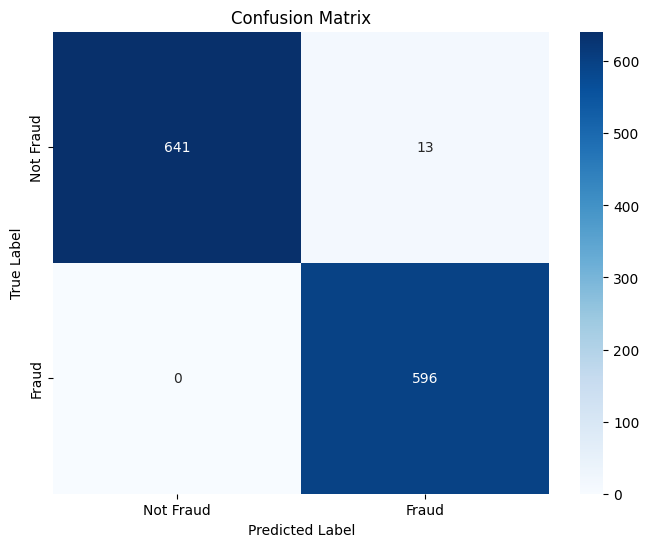

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Conduct Error Analysis

In [40]:
import numpy as np

# Get indices of misclassified samples
misclassified_indices = np.where(y_test != y_pred_test)[0]

# Extract misclassified samples
misclassified_samples = X_test.iloc[misclassified_indices]

# Print some misclassified samples
print("\nMisclassified Samples:")
print(misclassified_samples.head())

# Analyze the first few misclassified samples
for index in misclassified_indices[:5]:  # Print the first 5 misclassified samples
    print(f"\nIndex: {index}")
    print(f"True Label: {y_test.iloc[index]}")
    print(f"Predicted Label: {y_pred_test[index]}")
    print(f"Features: {X_test.iloc[index]}")



Misclassified Samples:
      type     amount  oldbalanceOrg  newbalanceOrig
1295     4  270772.03       159605.0             0.0
1590     1   21728.38            0.0             0.0
969      1   32330.31        30071.0             0.0
2217     1  190708.08       159006.0             0.0
2107     1  317038.97       268907.0             0.0

Index: 93
True Label: 0
Predicted Label: 1
Features: type                   4.00
amount            270772.03
oldbalanceOrg     159605.00
newbalanceOrig         0.00
Name: 1295, dtype: float64

Index: 167
True Label: 0
Predicted Label: 1
Features: type                  1.00
amount            21728.38
oldbalanceOrg         0.00
newbalanceOrig        0.00
Name: 1590, dtype: float64

Index: 240
True Label: 0
Predicted Label: 1
Features: type                  1.00
amount            32330.31
oldbalanceOrg     30071.00
newbalanceOrig        0.00
Name: 969, dtype: float64

Index: 262
True Label: 0
Predicted Label: 1
Features: type                   1.00
amo